## *Broken Compass*

[Official site.](https://twolittlemice.net/brokencompass/)

Basic mechanic:

1. Roll a pool of between 2 and 9 d6s.
2. Count matching sets.
    * 2-of-a-kind: Basic success (valued at 1 point).
    * 3-of-a-kind: Critical success (valued at 3 points).
    * 4-of-a-kind: Extreme success (valued at 9 points).
    * 5-of-a-kind: Impossible success (valued at 27 points).
    * 6-of-a-kind: What a Hero! (valued at 81 points).
3. Total up the points. (These point values reflect the "3X1" rule.)


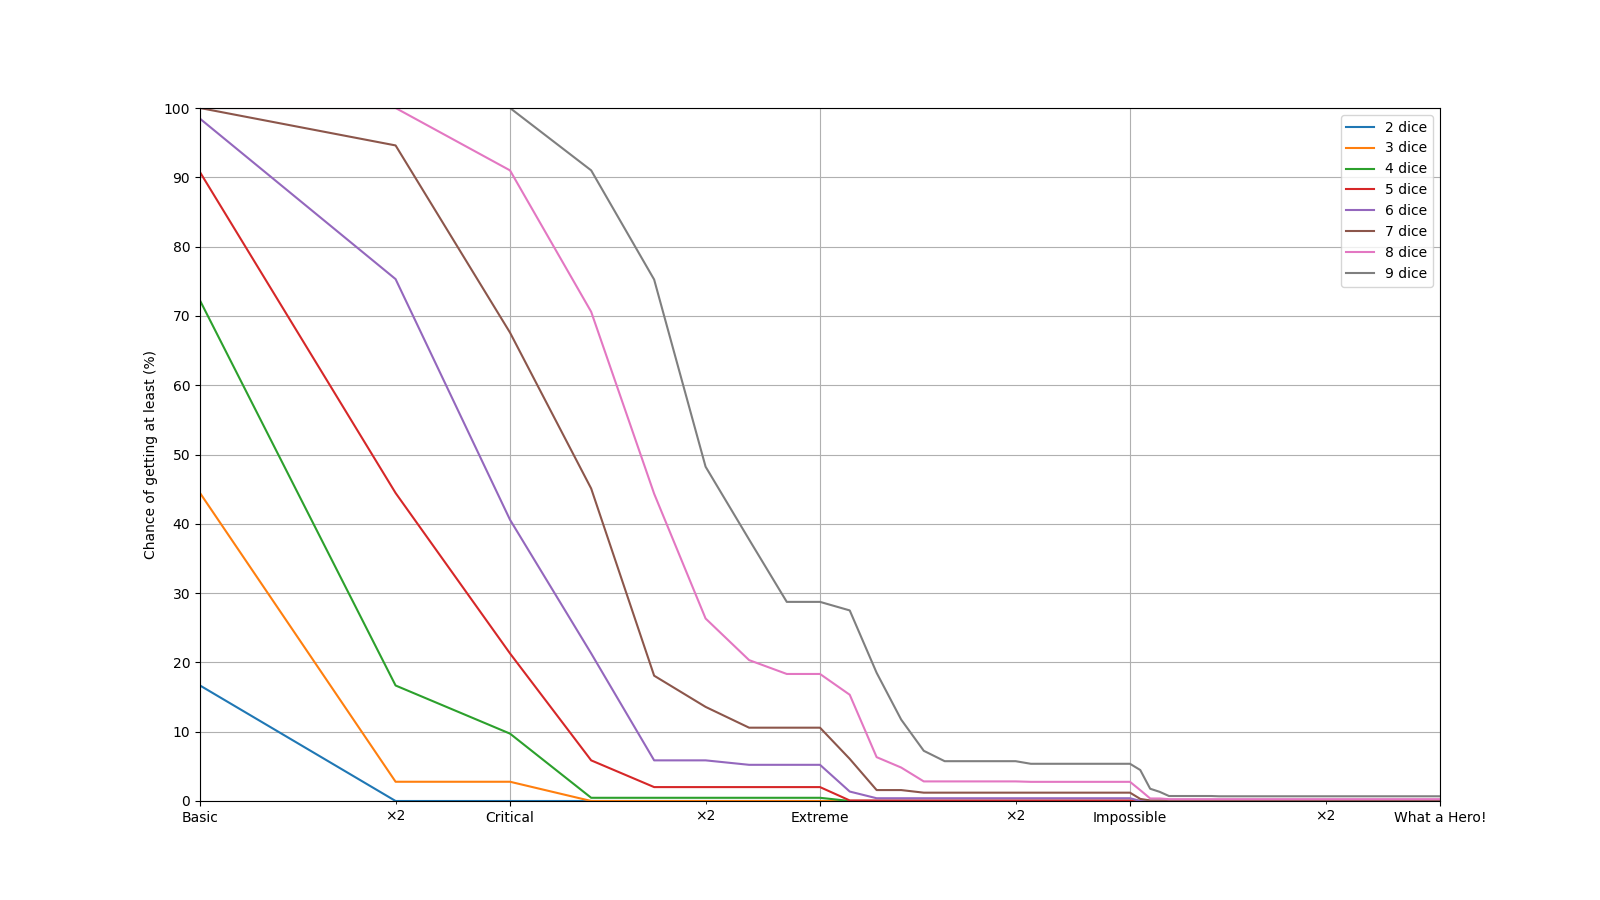

In [1]:
import piplite
await piplite.install("icepool")

import icepool
import matplotlib.pyplot as plt

class BrokenCompass(icepool.EvalPool):
    def next_state(self, state, outcome, count):
        state = state or 0
        # If a matching set, add the corresponding point value.
        if count >= 2:
            state += 3 ** (count - 2)
        state = min(state, 3 ** 4)
        return state

broken_compass = BrokenCompass()

figsize = (16, 9)
fig, ax = plt.subplots(figsize=figsize)

legend = []

for num_dice in range(2, 10):
    result = broken_compass.eval(icepool.d6.pool(num_dice))
    result, *_ = icepool.align_range(result, 1, 81)
    
    ax.semilogx(result.outcomes(), result.sf(percent=True))
    
    legend.append(f'{num_dice} dice')
    
ax.legend(legend)
ax.set_xticks([1, 3, 9, 27, 81])
ax.set_xticklabels(['Basic', 'Critical', 'Extreme', 'Impossible', 'What a Hero!'])
ax.set_xticks([2, 6, 18, 54], minor=True)
ax.set_xticklabels(['×2', '×2', '×2', '×2'], minor=True)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 81)
ax.set_ylim(0, 100)
ax.set_ylabel('Chance of getting at least (%)')
ax.grid()
plt.show()
